# Model Preparation

### Package and Module Setup

In [2]:
# Import needed packages and modules
import csv
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

## Import data

In [3]:
%run /Users/apassan/Documents/03_Professional/07_GitHubRepo/07_CreditCardFraud/scripts/data_prep

In [4]:
data_df = data_raw # Keeping a dataframe version will be useful for any quick checks
data_df.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,norm_distance_from_home,norm_distance_from_last_transaction,norm_ratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,0.0,0.477882,-0.182849,0.043491
1,1.0,0.0,0.0,0.0,0.0,-0.241607,-0.188094,-0.189300
2,1.0,0.0,0.0,1.0,0.0,-0.329369,-0.163733,-0.498812
3,1.0,1.0,0.0,1.0,0.0,-0.372854,0.021806,-0.522048
4,1.0,1.0,0.0,1.0,0.0,0.268572,-0.172968,0.142373


### Model Preparation

Prepare the data to be split.

In [5]:
# Create the features and the target variable.
cols = data_df.columns.tolist()
X_features = [c for c in cols if c not in ['fraud']]
X_features

X = data_df[X_features] # Features
Y = data_df['fraud'] # Target variable

print('X shape:', X.shape) 
print('Y shape:', Y.shape)

X shape: (1000000, 7)
Y shape: (1000000,)


Check for potential imbalances in the dataset.

In [6]:
data_df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

Based on the above, there are 87,403 fraud transactions, and 912,507 non-fraud transactions in the dataset. This means that only \~9.5% of the dataset has fraudulent transactions.

As this is an imbalanced dataset, this needs to be dealt with before creating any models. In this case, we will choose to under sample. Undersampling will aim to balance the class (fraudulent transaction or not) distribution in the dataset, by removing observations at random that belong to the majority class. 

### Undersampling

In [7]:
# Perform undersampling 
us = RandomUnderSampler(random_state=42)
X_us, Y_us = us.fit_resample(X,Y)

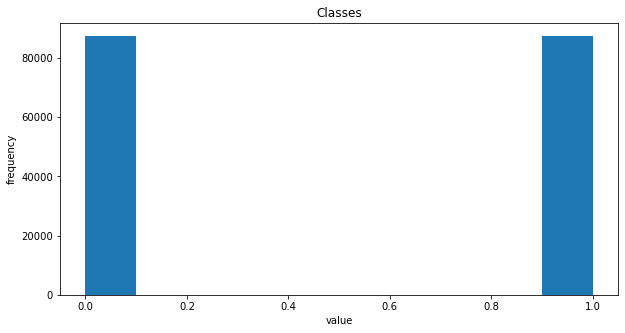

In [8]:
# Check if the undersampling worked
plt.figure(figsize=(10,5))
plt.hist(np.array(Y_us))
plt.title('Classes')
plt.xlabel('value')
plt.ylabel('frequency')
plt.show()

The dataset is more balanced now.

### Final data split

In [9]:
# Split the data
X_train, X_test,Y_train, Y_test = train_test_split(X_us, Y_us, test_size=0.2)

# Print the shapes to ensure the matrix dimensions line up
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (139844, 7)
Y_train shape: (139844,)
X_test shape: (34962, 7)
Y_test shape: (34962,)


The data has been accounted for its imbalance, and has been split into test and training sets.  

We can now move onto modeling. 

**Note:** A separate model_prep.py file has been created based on this jupyter notebook to properly split the data before creating the different classifiers.

### Overall Baseline Model

In machine learning it is important to have a baseline model to compare against different machine learning models developed. In this case I will make the assumption that all of the transactions are non-fraudulent. As ~90% of the data has non-fraudulent transactions, one could "say" that this baseline "model" assumption has an accuracy rate of 90%. This is the accuracy level to beat in developing different classification models. 